In [1]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

DADOS DAS COTAÇÕES

In [2]:
dados_bancarios = yf.download (['ITUB4.SA', 'BBAS3.SA', 'SANB4.SA', 'BBDC4.SA', '^BVSP'],
                               start = '2010-01-01', end = '2022-12-31')['Adj Close']

[*********************100%***********************]  5 of 5 completed


In [3]:
dados_bancarios

,BBAS3.SA,BBDC4.SA,ITUB4.SA,SANB4.SA,^BVSP
Date,,,,,
2010-01-04,12.641335,7.663084,10.762465,5.481998,70045.0
2010-01-05,12.514491,7.625372,10.832215,5.481998,70240.0
2010-01-06,12.531404,7.564361,10.738325,5.481998,70729.0
2010-01-07,12.535633,7.544035,10.628341,5.481998,70451.0
2010-01-08,12.607502,7.535896,10.467378,5.481998,70263.0
...,...,...,...,...,...
2022-12-23,34.267910,14.472077,24.834997,14.502596,109698.0
2022-12-26,34.219345,14.127959,24.342043,14.502596,108738.0
2022-12-27,33.082912,14.061048,24.204016,14.473494,108347.0


DADOS LUCRATIVIDADE (FUNDAMENTALISTA)

In [4]:
lucro_bancos = pd.read_excel ('D:/Python/Analise_de_dados_Python/Projeto_Mercado_Financeiro/lucro_bancos.xlsx', index_col = 'data')

In [5]:
lucro_bancos

,bradesco,banco_do_brasil,itau,santander
data,,,,
2009-12-31,8012282,10147522,10066608,1805899
2021-12-31,21945688,19710402,24988000,14987716


RETORNO MERCADO FINANCEIRO

In [6]:
itau = dados_bancarios ['ITUB4.SA']
santander = dados_bancarios ['SANB4.SA']
banco_do_brasil = dados_bancarios ['BBAS3.SA']
bradesco = dados_bancarios ['BBDC4.SA']
dados_mercado = dados_bancarios ['^BVSP']

In [7]:
def retorno(lista):
    retorno = lista [-1] / lista [0] -1

    return retorno

In [8]:
retorno_itau = retorno (lista = itau)
retorno_bb = retorno (lista = banco_do_brasil)
retorno_bradesco = retorno (lista = bradesco)
retorno_santander = retorno (lista = santander)
retorno_mercado = retorno (lista = dados_mercado)

DATAFRAME RETORNOS

In [9]:
df_retornos = pd.DataFrame (data = {'retornos': [retorno_itau, retorno_bb, 
                                    retorno_bradesco, retorno_santander, retorno_mercado]}, 
                            index = ['Itau', 'Banco_do_Brasil', 'Bradesco', 'Santander', 'Ibovespa'])

In [10]:
df_retornos ['retornos'] = df_retornos ['retornos'] * 100

In [11]:
df_retornos = df_retornos.sort_values (by = 'retornos', ascending = False)

In [12]:
df_retornos

,retornos
Banco_do_Brasil,166.852272
Santander,164.372501
Itau,129.015153
Bradesco,88.979215
Ibovespa,57.086159


VISUALIZAÇÃO DE DADOS

<function matplotlib.pyplot.show(close=None, block=None)>

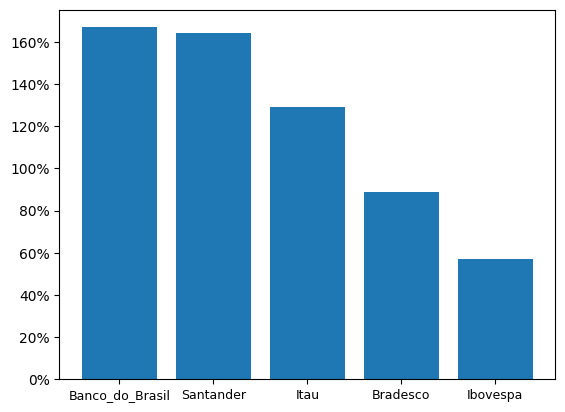

In [13]:
fig,ax = plt.subplots()
ax.bar (df_retornos.index, df_retornos['retornos'])
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.xticks (fontsize = 9)
plt.show

In [14]:
var_lucro_bancos = lucro_bancos.iloc[-1] / lucro_bancos.iloc[0] -1
var_lucro_bancos = var_lucro_bancos * 100
var_lucro_bancos = var_lucro_bancos.sort_values (ascending= False)
var_lucro_bancos

santander          729.931021
bradesco           173.900594
itau               148.226612
banco_do_brasil     94.238574
dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

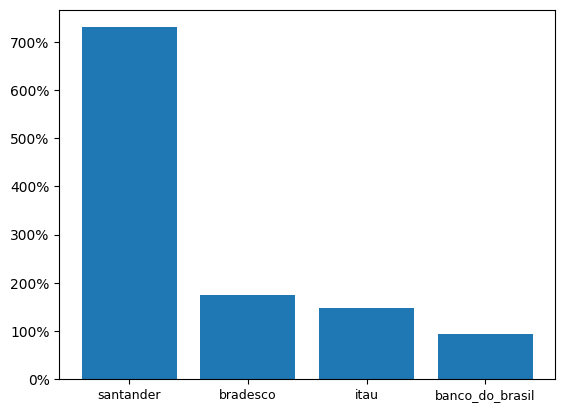

In [15]:
fig,ax = plt.subplots()
ax.bar (var_lucro_bancos.index, var_lucro_bancos)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.xticks (fontsize = 9)
plt.show

RENTABILIDADE

In [16]:
def resample_periodo (dado, periodo):
    dado_periodo_novo = dado.resample (f'{periodo}').last ()
    dado_periodo_novo = dado_periodo_novo.pct_change () 
    dado_periodo_novo = dado_periodo_novo.dropna ()
    return dado_periodo_novo


In [17]:
def long_short (long, short, periodo):
    var_long = resample_periodo (long, periodo)
    var_short = resample_periodo (short, periodo)
    outperfom = var_long - var_short
    print (outperfom)
    plt.plot (outperfom)

Date
2011-12-31   -0.046153
2012-12-31   -0.117863
2013-12-31    0.183811
2014-12-31   -0.063027
2015-12-31    0.441623
2016-12-31    0.099164
2017-12-31    0.147406
2018-12-31    0.499898
2019-12-31   -0.116459
2020-12-31    0.041423
2021-12-31   -0.147531
2022-12-31   -0.045719
Freq: A-DEC, dtype: float64


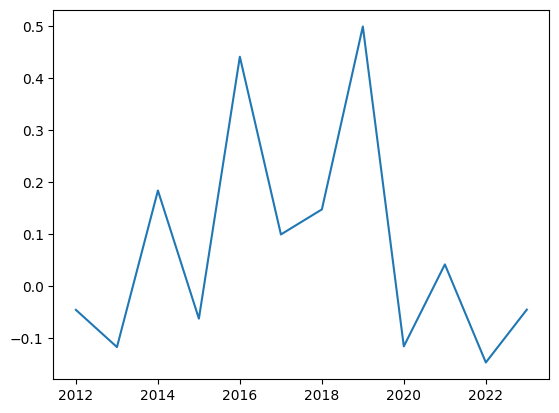

In [28]:
long_short (santander, dados_mercado, 'Y')


Date
2011-12-31    0.156416
2012-12-31    0.103979
2013-12-31    0.091790
2014-12-31    0.282885
2015-12-31   -0.165694
2016-12-31    0.347689
2017-12-31    0.066006
2018-12-31    0.148545
2019-12-31   -0.105009
2020-12-31   -0.180976
2021-12-31   -0.064425
2022-12-31   -0.161795
Freq: A-DEC, dtype: float64
<function long_short at 0x00000166D5AA9BD0>


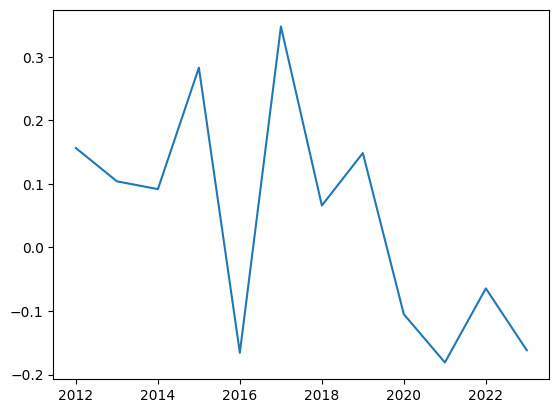

In [31]:
long_short (bradesco, dados_mercado, 'Y')

Date
2011-12-31    0.080495
2012-12-31   -0.058441
2013-12-31    0.247311
2014-12-31    0.254034
2015-12-31    0.013112
2016-12-31    0.110356
2017-12-31    0.037144
2018-12-31    0.177823
2019-12-31   -0.220809
2020-12-31   -0.154288
2021-12-31   -0.192647
2022-12-31    0.192970
Freq: A-DEC, dtype: float64


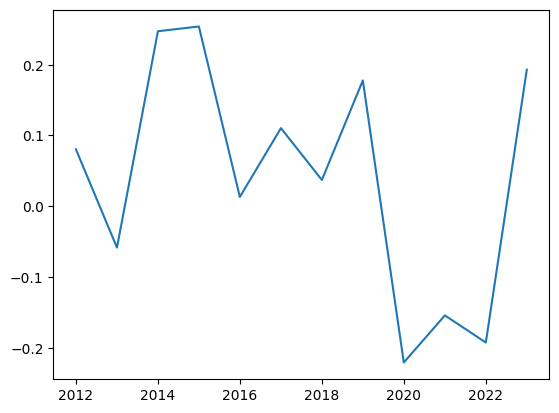

In [32]:
long_short (itau, dados_mercado, 'Y')

Date
2011-12-31   -0.009589
2012-12-31    0.083007
2013-12-31    0.208947
2014-12-31    0.070940
2015-12-31   -0.181796
2016-12-31    0.604791
2017-12-31   -0.100082
2018-12-31    0.373754
2019-12-31   -0.109081
2020-12-31   -0.264643
2021-12-31   -0.077528
2022-12-31    0.239088
Freq: A-DEC, dtype: float64


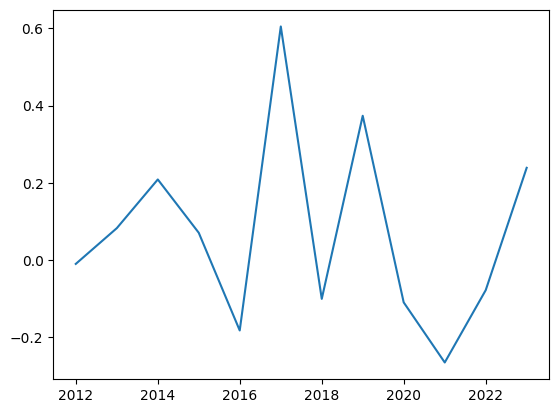

In [33]:
long_short (banco_do_brasil, dados_mercado, 'Y')